In [1]:
import os
import sys

def add_path():
    path = os.path.abspath(os.path.join(os.getcwd(), "../"))
    if path not in sys.path:
        sys.path.append(path)
    
    path = os.path.abspath(os.path.join(os.getcwd(), "../../"))
    if path not in sys.path:
        sys.path.append(path)

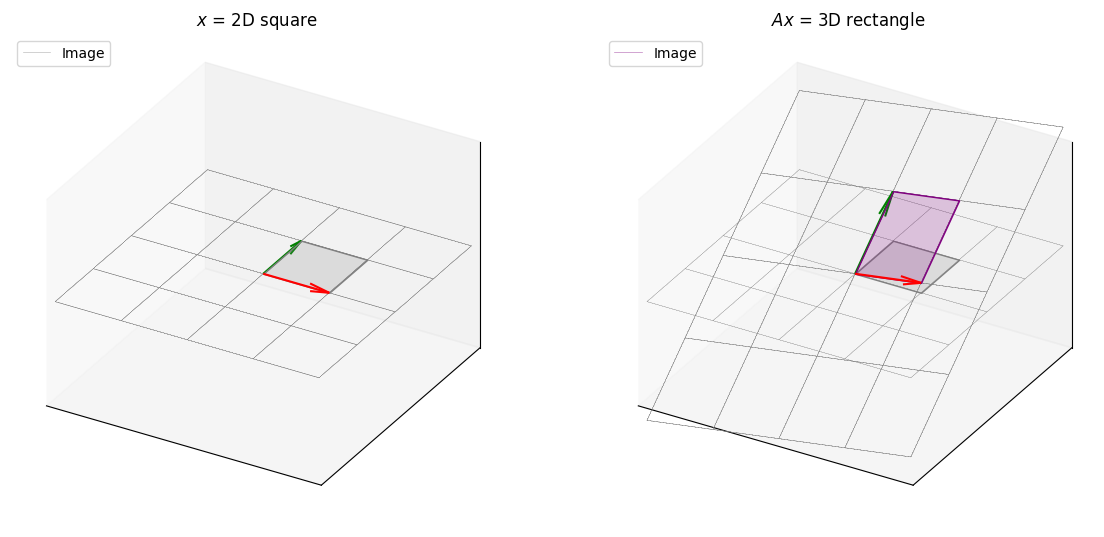

In [179]:
add_path()
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from intuitive_understanding_of_linear_algebra.src import utils

xlim = (-2, 2)
ylim = (-2, 2)
zlim = (-2, 2)

basis = np.array(
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
    ]
)

matrix_a = np.array(
    [
        [1, 0],
        [0, 1],
        [0.2, 1],
    ]
)

square = utils.cube(return_vertices=True)[:, :2][:5]

fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(121, projection="3d")
ax1.set_proj_type("ortho")
ax1.set_title("$x$ = 2D square")
ax1.add_collection3d(
    Poly3DCollection(
        [list(zip(square[:, 0], square[:, 1], np.zeros_like(square[:, 0])))],
        color="gray",
        alpha=0.2,
    )
)

utils.plot_full_custom_3d_grid(ax1, np.vstack([basis[:2, :], np.zeros(3)]).T, xlim, ylim, zlim, linewidth=0.2)

ax1.plot(square[:, 0], square[:, 1], color="gray", label="Image", linewidth=0.5, alpha=0.5)
ax1.quiver(0, 0, 0, basis[0][0], basis[1][0], basis[2][0], color="r")
ax1.quiver(0, 0, 0, basis[0][1], basis[1][1], basis[2][1], color="g")
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_zlim(zlim)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_aspect("auto")
ax1.legend(loc="upper left")

square = (matrix_a @ square.T).T

ax2 = fig.add_subplot(122, projection="3d")
ax2.set_proj_type("ortho")
ax2.set_title("$Ax$ = 3D rectangle")
ax2.add_collection3d(
    Poly3DCollection(
        [list(zip(square[:, 0], square[:, 1], np.zeros_like(square[:, 0])))],
        color="gray",
        alpha=0.2,
    )
)

ax2.add_collection3d(
    Poly3DCollection(
        [list(zip(square[:, 0], square[:, 1], square[:, 2]))],
        color="purple",
        alpha=0.2,
    )
)

utils.plot_full_custom_3d_grid(ax2, np.vstack([basis[:2, :], np.zeros(3)]).T, xlim, ylim, zlim, linewidth=0.1)
utils.plot_full_custom_3d_grid(ax2, np.hstack([matrix_a, np.zeros(3).reshape(3, 1)]).T, xlim, ylim, zlim, linewidth=0.2)

ax2.plot(square[:, 0], square[:, 1], square[:, 2], color="purple", label="Image", linewidth=0.5, alpha=0.5)
ax2.quiver(0, 0, 0, matrix_a[0][0], matrix_a[1][0], matrix_a[2][0], color="r")
ax2.quiver(0, 0, 0, matrix_a[0][1], matrix_a[1][1], matrix_a[2][1], color="g")
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.set_zlim(zlim)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_aspect("auto")
ax2.legend(loc="upper left")

plt.show()


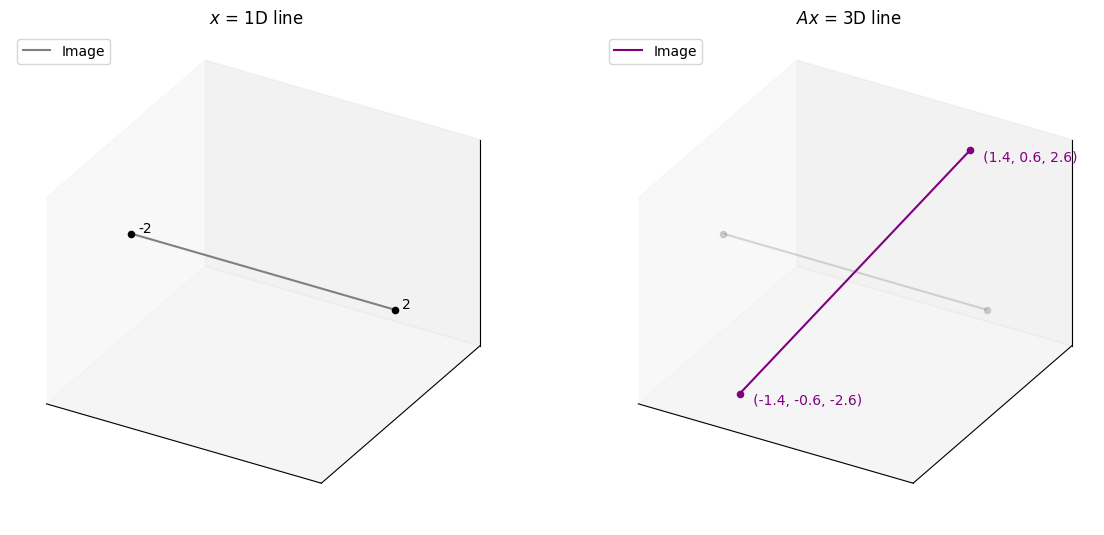

In [184]:
add_path()
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from intuitive_understanding_of_linear_algebra.src import utils

xlim = (-2, 2)
ylim = (-2, 2)
zlim = (-2, 2)

matrix_a = np.array(
    [
        [0.7],
        [0.3],
        [1.3],
    ]
)

line = np.array([2, -2])

fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(121, projection="3d")
ax1.set_proj_type("ortho")
ax1.set_title("$x$ = 1D line")
ax1.plot(
    line,
    np.zeros(line.shape[0]),
    np.zeros(line.shape[0]),
    color="gray",
    label="Image",
    linewidth=1.5,
    alpha=1,
)

ax1.scatter([line[0]], [0], [0], color="black")
ax1.scatter([line[1]], [0], [0], color="black")

for i, txt in enumerate(line):
    ax1.text(line[i] + 0.1, 0, 0, f'{line[i]}', fontsize=10, color='black', va="bottom")

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_zlim(zlim)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_aspect("auto")
ax1.legend(loc="upper left")

line_transformed = matrix_a @ line.reshape(1, -1)

ax2 = fig.add_subplot(122, projection="3d")
ax2.set_proj_type("ortho")
ax2.set_title("$Ax$ = 3D line")
ax2.plot(
    line,
    np.zeros(line.shape[0]),
    np.zeros(line.shape[0]),
    color="gray",
    linewidth=1.5,
    alpha=0.3,
)

ax2.scatter([line[0]], [0], [0], color="gray", alpha=0.3)
ax2.scatter([line[1]], [0], [0], color="gray", alpha=0.3)

ax2.plot(
    line_transformed[0],
    line_transformed[1],
    line_transformed[2],
    color="purple",
    label="Image",
    linewidth=1.5,
    alpha=1,
)

ax2.scatter(*line_transformed[:, 0], color="purple")
ax2.scatter(*line_transformed[:, 1], color="purple")

for i in range(line_transformed.shape[1]):
    ax2.text(
        line_transformed[0, i], 
        line_transformed[1, i], 
        line_transformed[2, i], 
        f'   ({line_transformed[0, i]}, {line_transformed[1, i]}, {line_transformed[2, i]})', 
        fontsize=10, 
        color='purple', 
        va="top"
    )

ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.set_zlim(zlim)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_aspect("auto")
ax2.legend(loc="upper left")

plt.show()